In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ROOT import *
import os
from iminuit import Minuit
from iminuit.cost import LeastSquares

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.596e+05 (chi2/ndof = 51925.9)│              Nfcn = 59               │
│ EDM = 2.56e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──

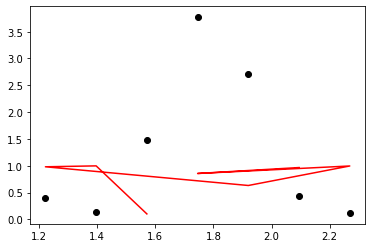

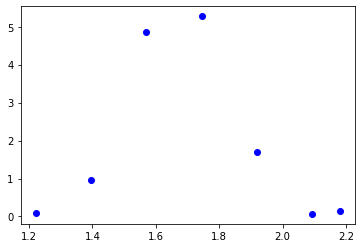

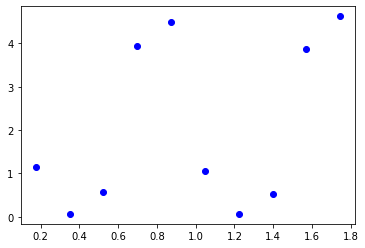

In [17]:
def rd_data(str):
    arr0=np.array([])
    for line in open(str):
        d=line.split()
        if len(d) != 1:
            continue
        arr0=np.append(arr0,float(d[0]))
    return arr0  


def getDATA(str):
    main_path=os.getcwd()
    
    for folder_path,folders,files in os.walk(main_path+str):
        a=1
    
    N=len(files)
    angles=np.array([])
    for i in range(0,N):
        arr=files[i].split('.')
        angles=np.append(angles,float(arr[0]))
    
    items={
        f'array{num+1}':[] for num in range(N)
    }
    
    mean_values=np.array([])
    std_devs=np.array([])
    for i in range(0,N):
        items[i]=rd_data(main_path+str+'/'+files[i])
        mean_values=np.append(mean_values,items[i].mean())
        std_devs=np.append(std_devs,items[i].std())
        
    return angles*np.pi/180, mean_values,std_devs

def plot_and_fit(arr0,arr1,arr2):
    def model(x,p):
        return p[0]*np.cos(x+p[1])**2
    fnc = LeastSquares(arr0, arr1, arr2, model)
    m = Minuit(fnc, (4, 0))
    m.migrad()
    print(m)
    fig=plt.figure()
    plt.errorbar(arr0,arr1,yerr=arr2,color='black',fmt='o')
    plt.plot(arr0,model(arr1,m.values),color='r')
    plt.show()
    
    return fig

figZ1=plot_and_fit(getDATA('/data/data_Z1')[0],getDATA('/data/data_Z1')[1],getDATA('/data/data_Z1')[2])


##DATI ACQUA
plt.plot(getDATA('/data/data_H2O')[0],getDATA('/data/data_H2O')[1],'bo')   
plt.show()

##DATI ARIA
plt.plot(getDATA('/data/data_air')[0],getDATA('/data/data_air')[1],'bo')   
plt.show()

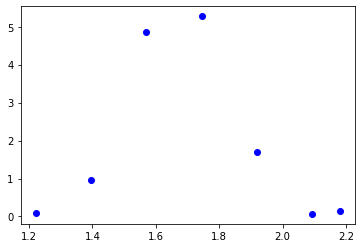

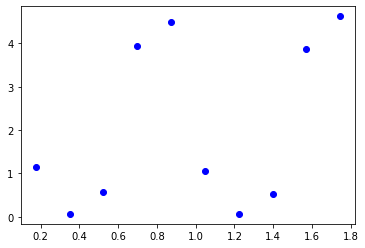

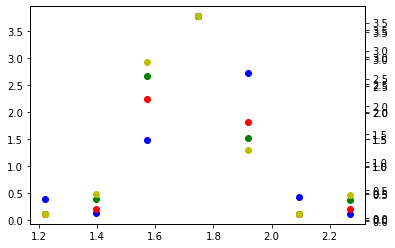

In [14]:
fig,ax0=plt.subplots()
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax3 = ax0.twinx()
ax0.plot(getDATA('/data/data_Z1')[0],getDATA('/data/data_Z1')[1],'bo')
ax1.plot(getDATA('/data/data_Z2')[0],getDATA('/data/data_Z2')[1],'ro')
ax2.plot(getDATA('/data/data_Z4')[0],getDATA('/data/data_Z4')[1],'go')
ax3.plot(getDATA('/data/data_Z8')[0],getDATA('/data/data_Z8')[1],'yo')